In [89]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import data_visualization as dv
from copy import deepcopy
import time
from pathlib import Path
import pandas as pd
import glob
from IPython.display import display

import read_data_functions as rdf
import plot_functions as pf
from Optimal_Stopping_Object import ModelConstructor
from initializer import InitialThangs
import loss_functions as lf
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Inputs

---
1. Switch Delay
2. Reward weighting
3. Altered SD 

        - Agent SD
        - Movement SD
        - Reaction SD
        - Gamble SD

---
NOTE: I'm using the data for guess sd. Haven't been able to really fit this with realistic parameters of the model. 

- This is likely due to people's intended decision time changing, whereas in the model, it is all around a single decision time
---

# Select Exp1 or Exp2


In [90]:
EXPERIMENT = "Exp1"

# Initial Thangs


In [92]:
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
wheel = dv.ColorWheel()

# Get path and save path 
LOAD_PATH = Path(f"D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{EXPERIMENT}")
SAVE_PATH = Path(f"D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\results\\{EXPERIMENT}")
it = InitialThangs(EXPERIMENT)

# Pickle Data


In [93]:
from src import constants


if "group" not in locals():
    group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
else:
    if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
        group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
    
model_path = constants.MODELS_PATH / "warmstart_models"
model_inputs_dfs = list(model_path.glob(f"{EXPERIMENT}_suboptimal_warmstart_inputs*"))
model_results_dfs = list(model_path.glob(f"{EXPERIMENT}_suboptimal_warmstart_results*"))

# Overall Analysis of Models

## Get models

In [94]:
df_inputs = pd.read_pickle(model_inputs_dfs[-1])
df_results = pd.read_pickle(model_results_dfs[-1])

In [95]:
df_inputs

,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,round_num,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,use_true_guess_sd,electromechanical_sd,guess_sd_from_data,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess
0,suboptimal_model0_2023_11_02_17_17_44,2.480233,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[127]], [[124]]]","[[[148.65616860969894], [148.65616860969894], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[14]], [[13]]]","[[[50]], [[50]]]","[[[64]], [[63]]]",1.0,0.0,0.0,1.0,0.5
1,suboptimal_model1_2023_11_02_17_17_58,3.110572,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[121]], [[118]]]","[[[143.56411970166934], [143.56411970166934], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[54]], [[53]]]","[[[50]], [[50]]]","[[[104]], [[103]]]",1.0,0.0,0.0,1.0,0.5
2,suboptimal_model2_2023_11_02_17_18_12,8.024529,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[112]], [[80]]]","[[[136.06489799252137], [136.06489799252137], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[1]], [[1]]]","[[[50]], [[50]]]","[[[51]], [[51]]]",1.0,0.0,0.0,1.0,0.5
3,suboptimal_model3_2023_11_02_17_18_23,2.708032,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[112]], [[33]]]","[[[136.06489799252137], [136.06489799252137], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[37]], [[35]]]","[[[50]], [[50]]]","[[[87]], [[85]]]",1.0,0.0,0.0,1.0,0.5
4,suboptimal_model4_2023_11_02_17_18_28,4.480949,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[120]], [[117]]]","[[[142.72230542460852], [142.72230542460852], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[58]], [[56]]]","[[[50]], [[50]]]","[[[108]], [[106]]]",1.0,0.0,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,suboptimal_model9995_2023_11_03_20_52_28,3.893873,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[120]], [[120]]]","[[[142.72230542460852], [142.72230542460852], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[76]], [[74]]]","[[[50]], [[50]]]","[[[126]], [[124]]]",1.0,0.0,0.0,1.0,0.5
9996,suboptimal_model9996_2023_11_03_20_52_35,7.084150,Exp1,6,"[[[1000.2151714324948], [1003.90

## Calculate number of unknown parameters and  BIC

In [96]:
# # Count the number of unknowns/alterations were made to the model
# df['Parameters'] = np.where(df_description.isin([False,'Less','Greater']),1,0).sum(axis=1)
# n = group.exp_info.num_subjects
# df['BIC'] = n*np.log(df['Loss']/n) + df['Parameters']*np.log(n)
# df

In [97]:
# # Count the number of unknowns/alterations were made to the model
# df_description['Parameters'] = np.where(df_description.isin([False,'Less','Greater']),1,0).sum(axis=1)
# n = group.exp_info.num_subjects
# df_description['BIC'] = n*np.log(df_description['Loss']/n) + df_description['Parameters']*np.log(n)
# df_description

## Run Models

In [99]:
df_models_to_run = df_inputs[df_inputs['Loss'] == df_inputs['Loss'].min()]
display(df_models_to_run)
display(df_models_to_run['guess_switch_delay'])
display(df_models_to_run['guess_switch_sd'])

,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,round_num,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,use_true_guess_sd,electromechanical_sd,guess_sd_from_data,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess
4205,suboptimal_model4205_2023_11_03_04_52_53,2.354769,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[125]], [[4]]]","[[[146.9512043697337], [146.9512043697337], [1...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[32]], [[31]]]","[[[50]], [[50]]]","[[[82]], [[81]]]",1.0,0.0,0.0,1.0,0.5


4205    [[[32]], [[31]]]
Name: guess_switch_delay, dtype: object

4205    [[[125]], [[4]]]
Name: guess_switch_sd, dtype: object

In [100]:
df_inputs.query("Loss <3")

,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,round_num,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,use_true_guess_sd,electromechanical_sd,guess_sd_from_data,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess
0,suboptimal_model0_2023_11_02_17_17_44,2.480233,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[127]], [[124]]]","[[[148.65616860969894], [148.65616860969894], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[14]], [[13]]]","[[[50]], [[50]]]","[[[64]], [[63]]]",1.0,0.0,0.0,1.0,0.5
3,suboptimal_model3_2023_11_02_17_18_23,2.708032,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[112]], [[33]]]","[[[136.06489799252137], [136.06489799252137], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[37]], [[35]]]","[[[50]], [[50]]]","[[[87]], [[85]]]",1.0,0.0,0.0,1.0,0.5
5,suboptimal_model5_2023_11_02_17_18_39,2.397077,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[128]], [[74]]]","[[[149.51139242785226], [149.51139242785226], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[20]], [[16]]]","[[[50]], [[50]]]","[[[70]], [[66]]]",1.0,0.0,0.0,1.0,0.5
10,suboptimal_model10_2023_11_02_17_20_07,2.430640,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[127]], [[57]]]","[[[148.65616860969894], [148.65616860969894], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[2]], [[0]]]","[[[50]], [[50]]]","[[[52]], [[50]]]",1.0,0.0,0.0,1.0,0.5
12,suboptimal_model12_2023_11_02_17_20_24,2.597981,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[124]], [[15]]]","[[[146.10152793764766], [146.10152793764766], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[58]], [[58]]]","[[[50]], [[50]]]","[[[108]], [[108]]]",1.0,0.0,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,suboptimal_model9979_2023_11_03_20_49_51,2.429708,Exp1,6,"[[[1000.2151714324948], [1003.9094760894775], ...","[[[48.50451553531825], [144.43657220944465], [...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[23.22162328895067]], [[23.22162328895067]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[127]], [[127]]]","[[[148.65616860969894], [148.65616860969894], ...",False,"[[[10]], [[10]]]",False,"[[[241.25]], [[241.25]]]","[[[151.0]], [[151.0]]]","[[[6]], [[4]]]","[[[50]], [[50]]]","[[[56]], [[54]]]",1.0,0.0,0.0,1.0,0.5
9980,suboptimal_model9980_2023_11_03_20_50_00,2.502921,Exp1,6,"[[[1000.2151714324948], [1003.909476

In [101]:
models = []
for index,row in df_models_to_run.iterrows():
    model  = ModelConstructor(
        experiment=EXPERIMENT,
        num_blocks=row.num_blocks,
        num_timesteps=1800,
        agent_means=row.agent_means,
        agent_sds=row.agent_sds,
        reaction_time=row.reaction_time,
        movement_time=row.movement_time,
        reaction_sd=row.reaction_sd, 
        movement_sd=row.movement_sd,
        timing_sd=row.timing_sd,
        guess_switch_delay=row.guess_switch_delay, 
        guess_switch_sd=row.guess_switch_sd, 
        electromechanical_delay=row.electromechanical_delay,
        switch_cost_exists=True,
        expected=True,
        win_reward=row.win_reward,
        incorrect_cost=row.incorrect_cost,
        indecision_cost=row.indecision_cost,
        round_num = 20
    )
    models.append(model)

# Plots

In [105]:
# line_colors = [wheel.purple, wheel.white, wheel.rak_blue, wheel.rak_orange, wheel.pink]
save = False

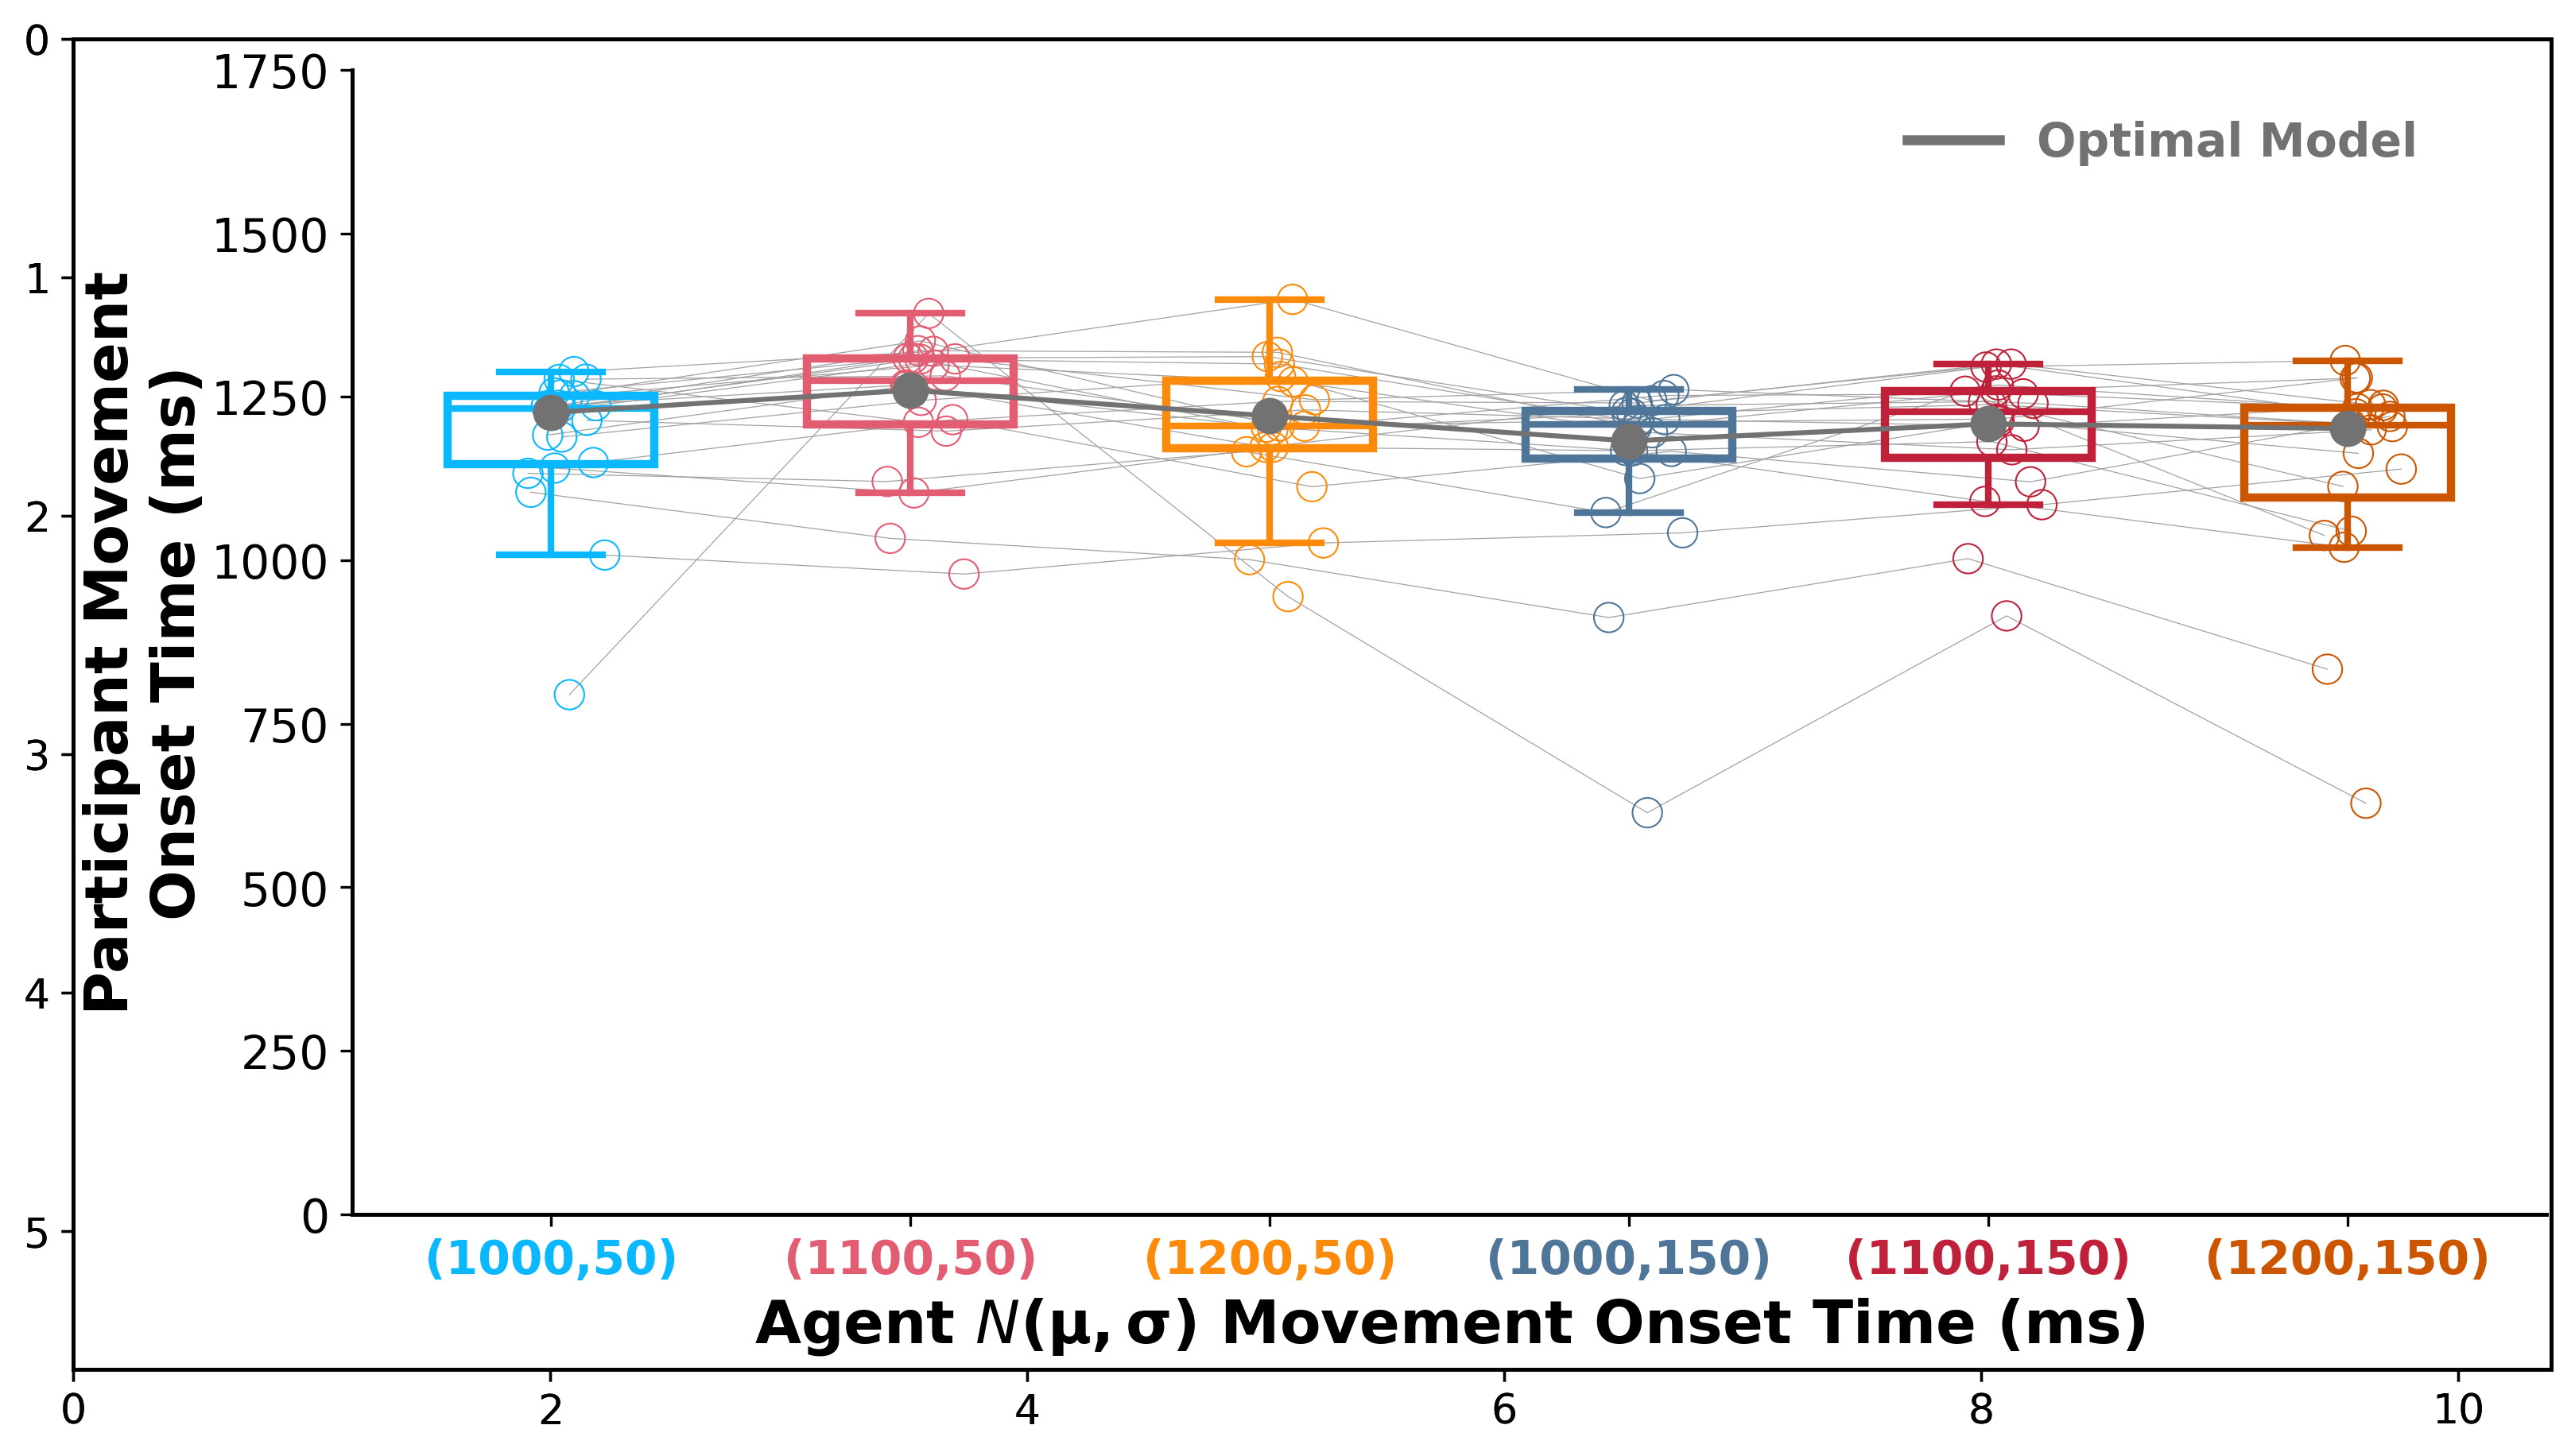

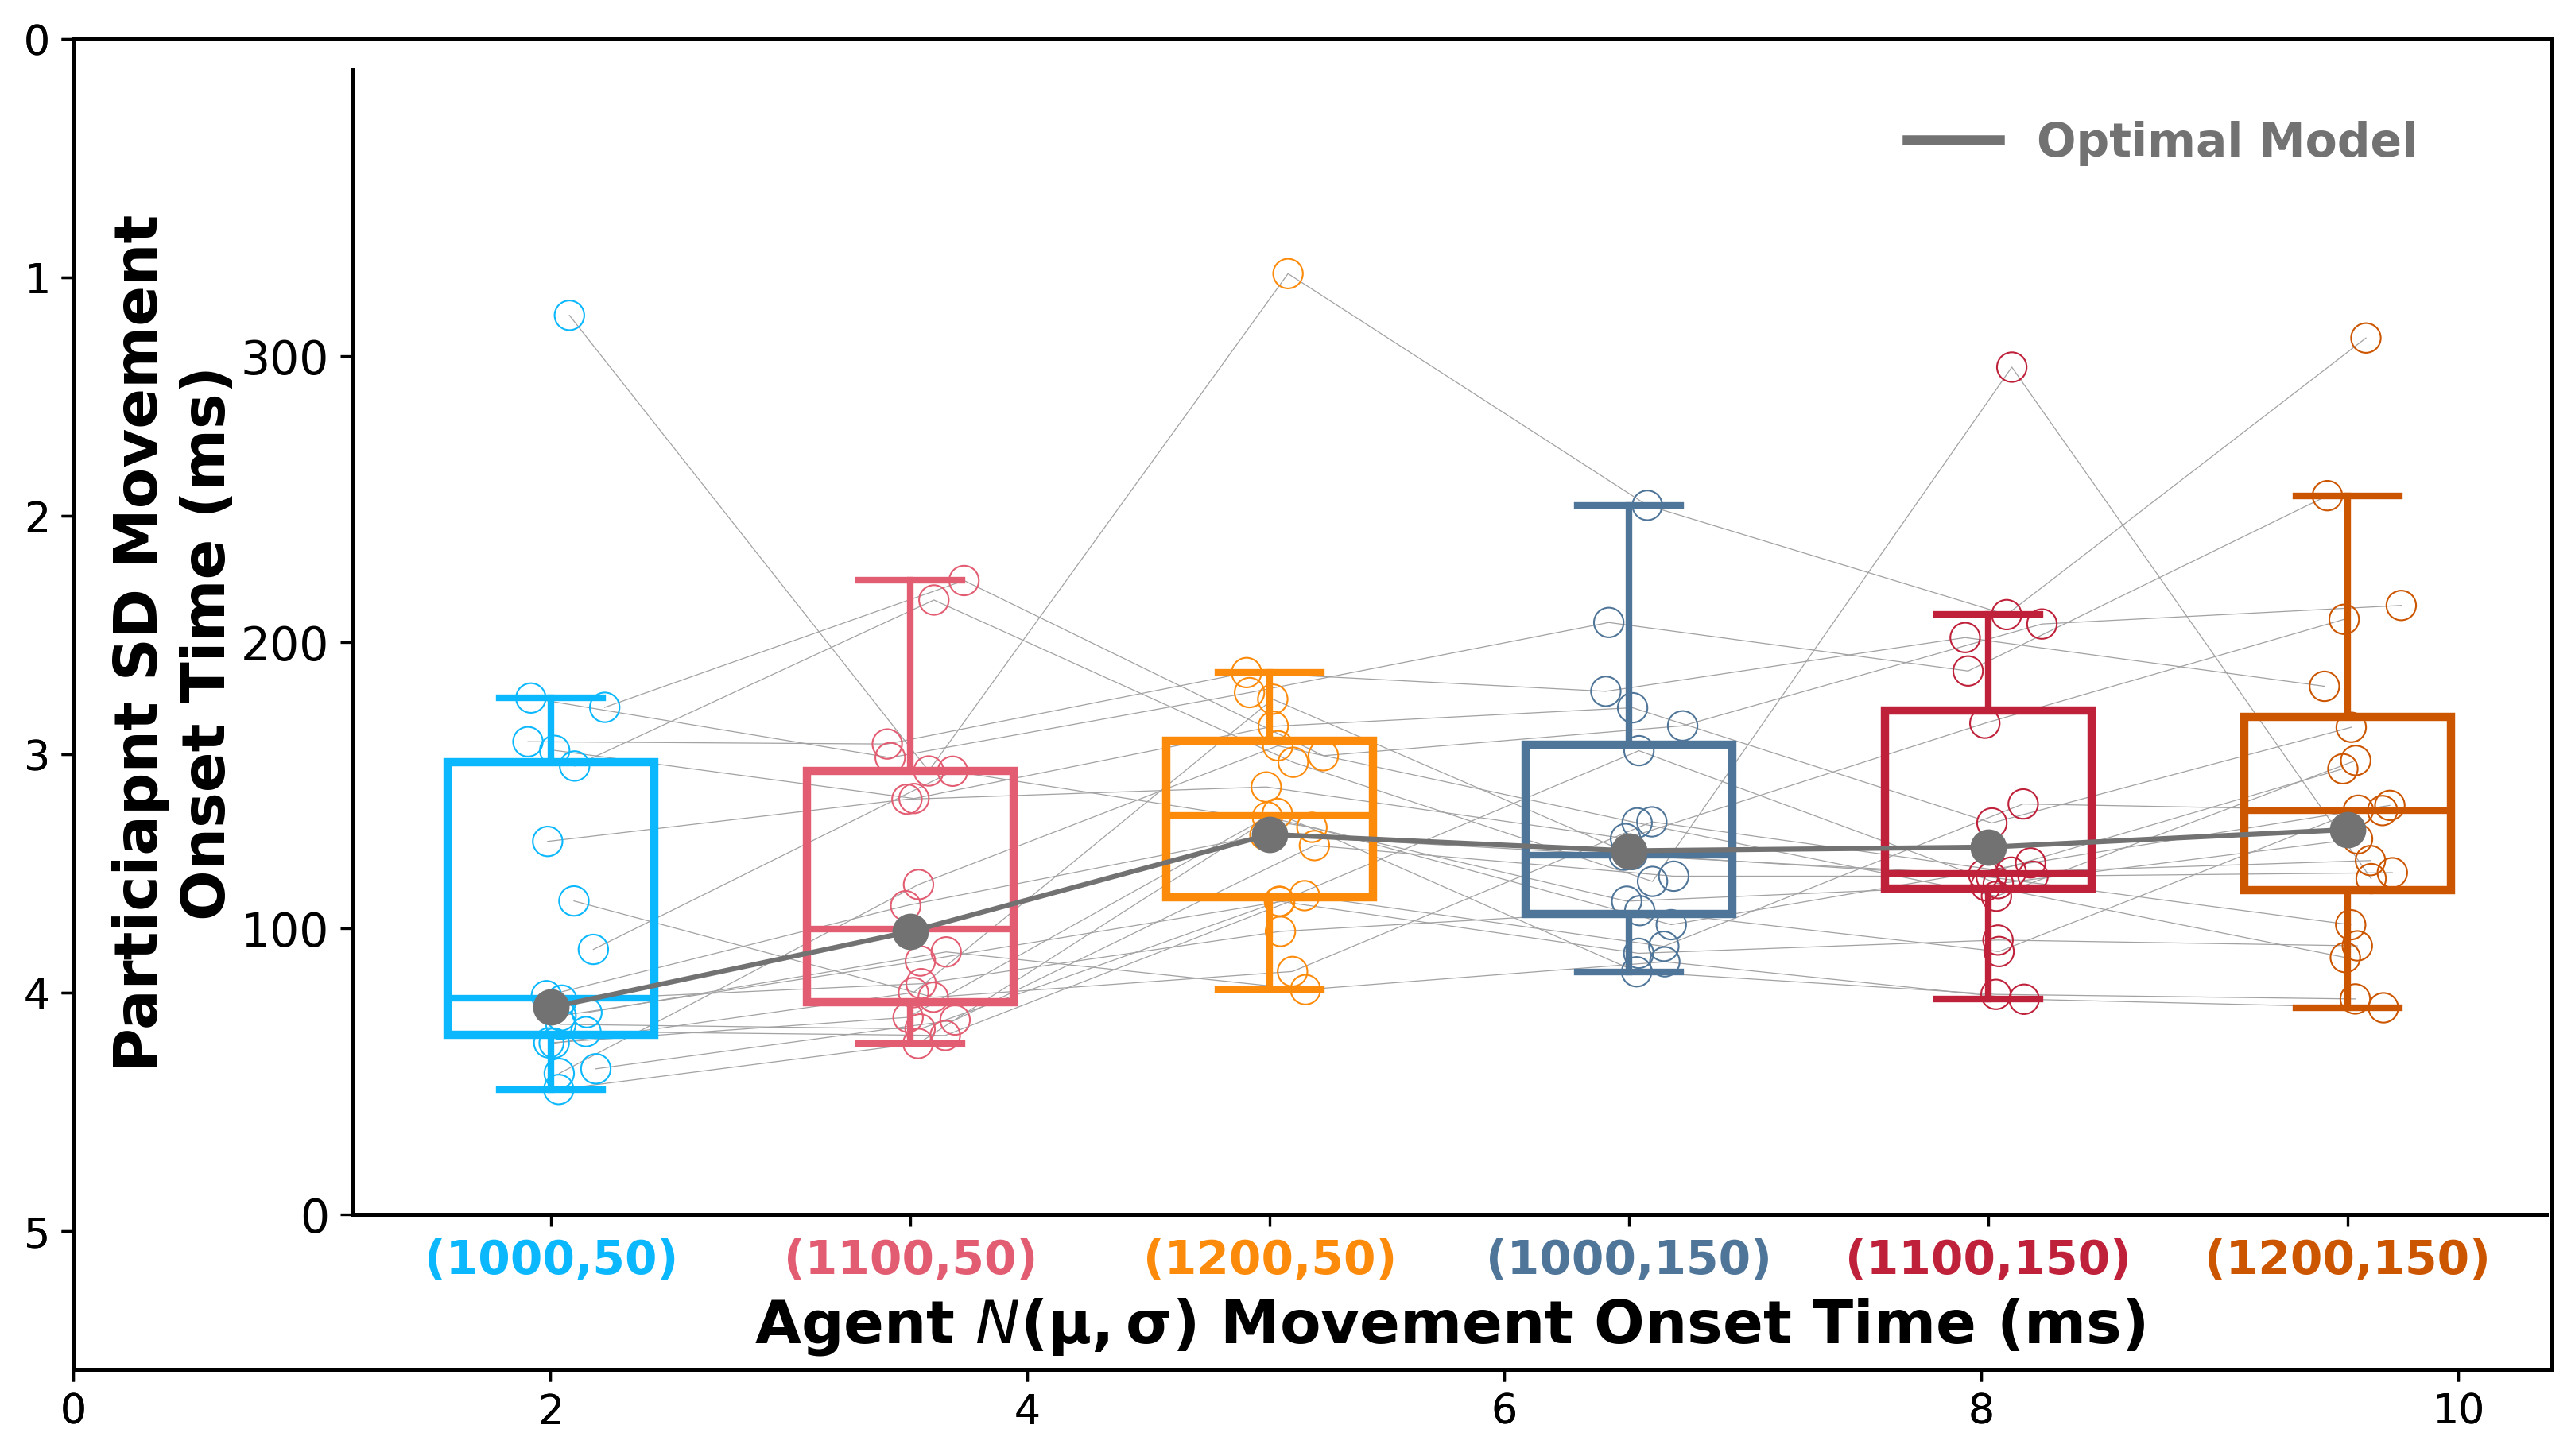

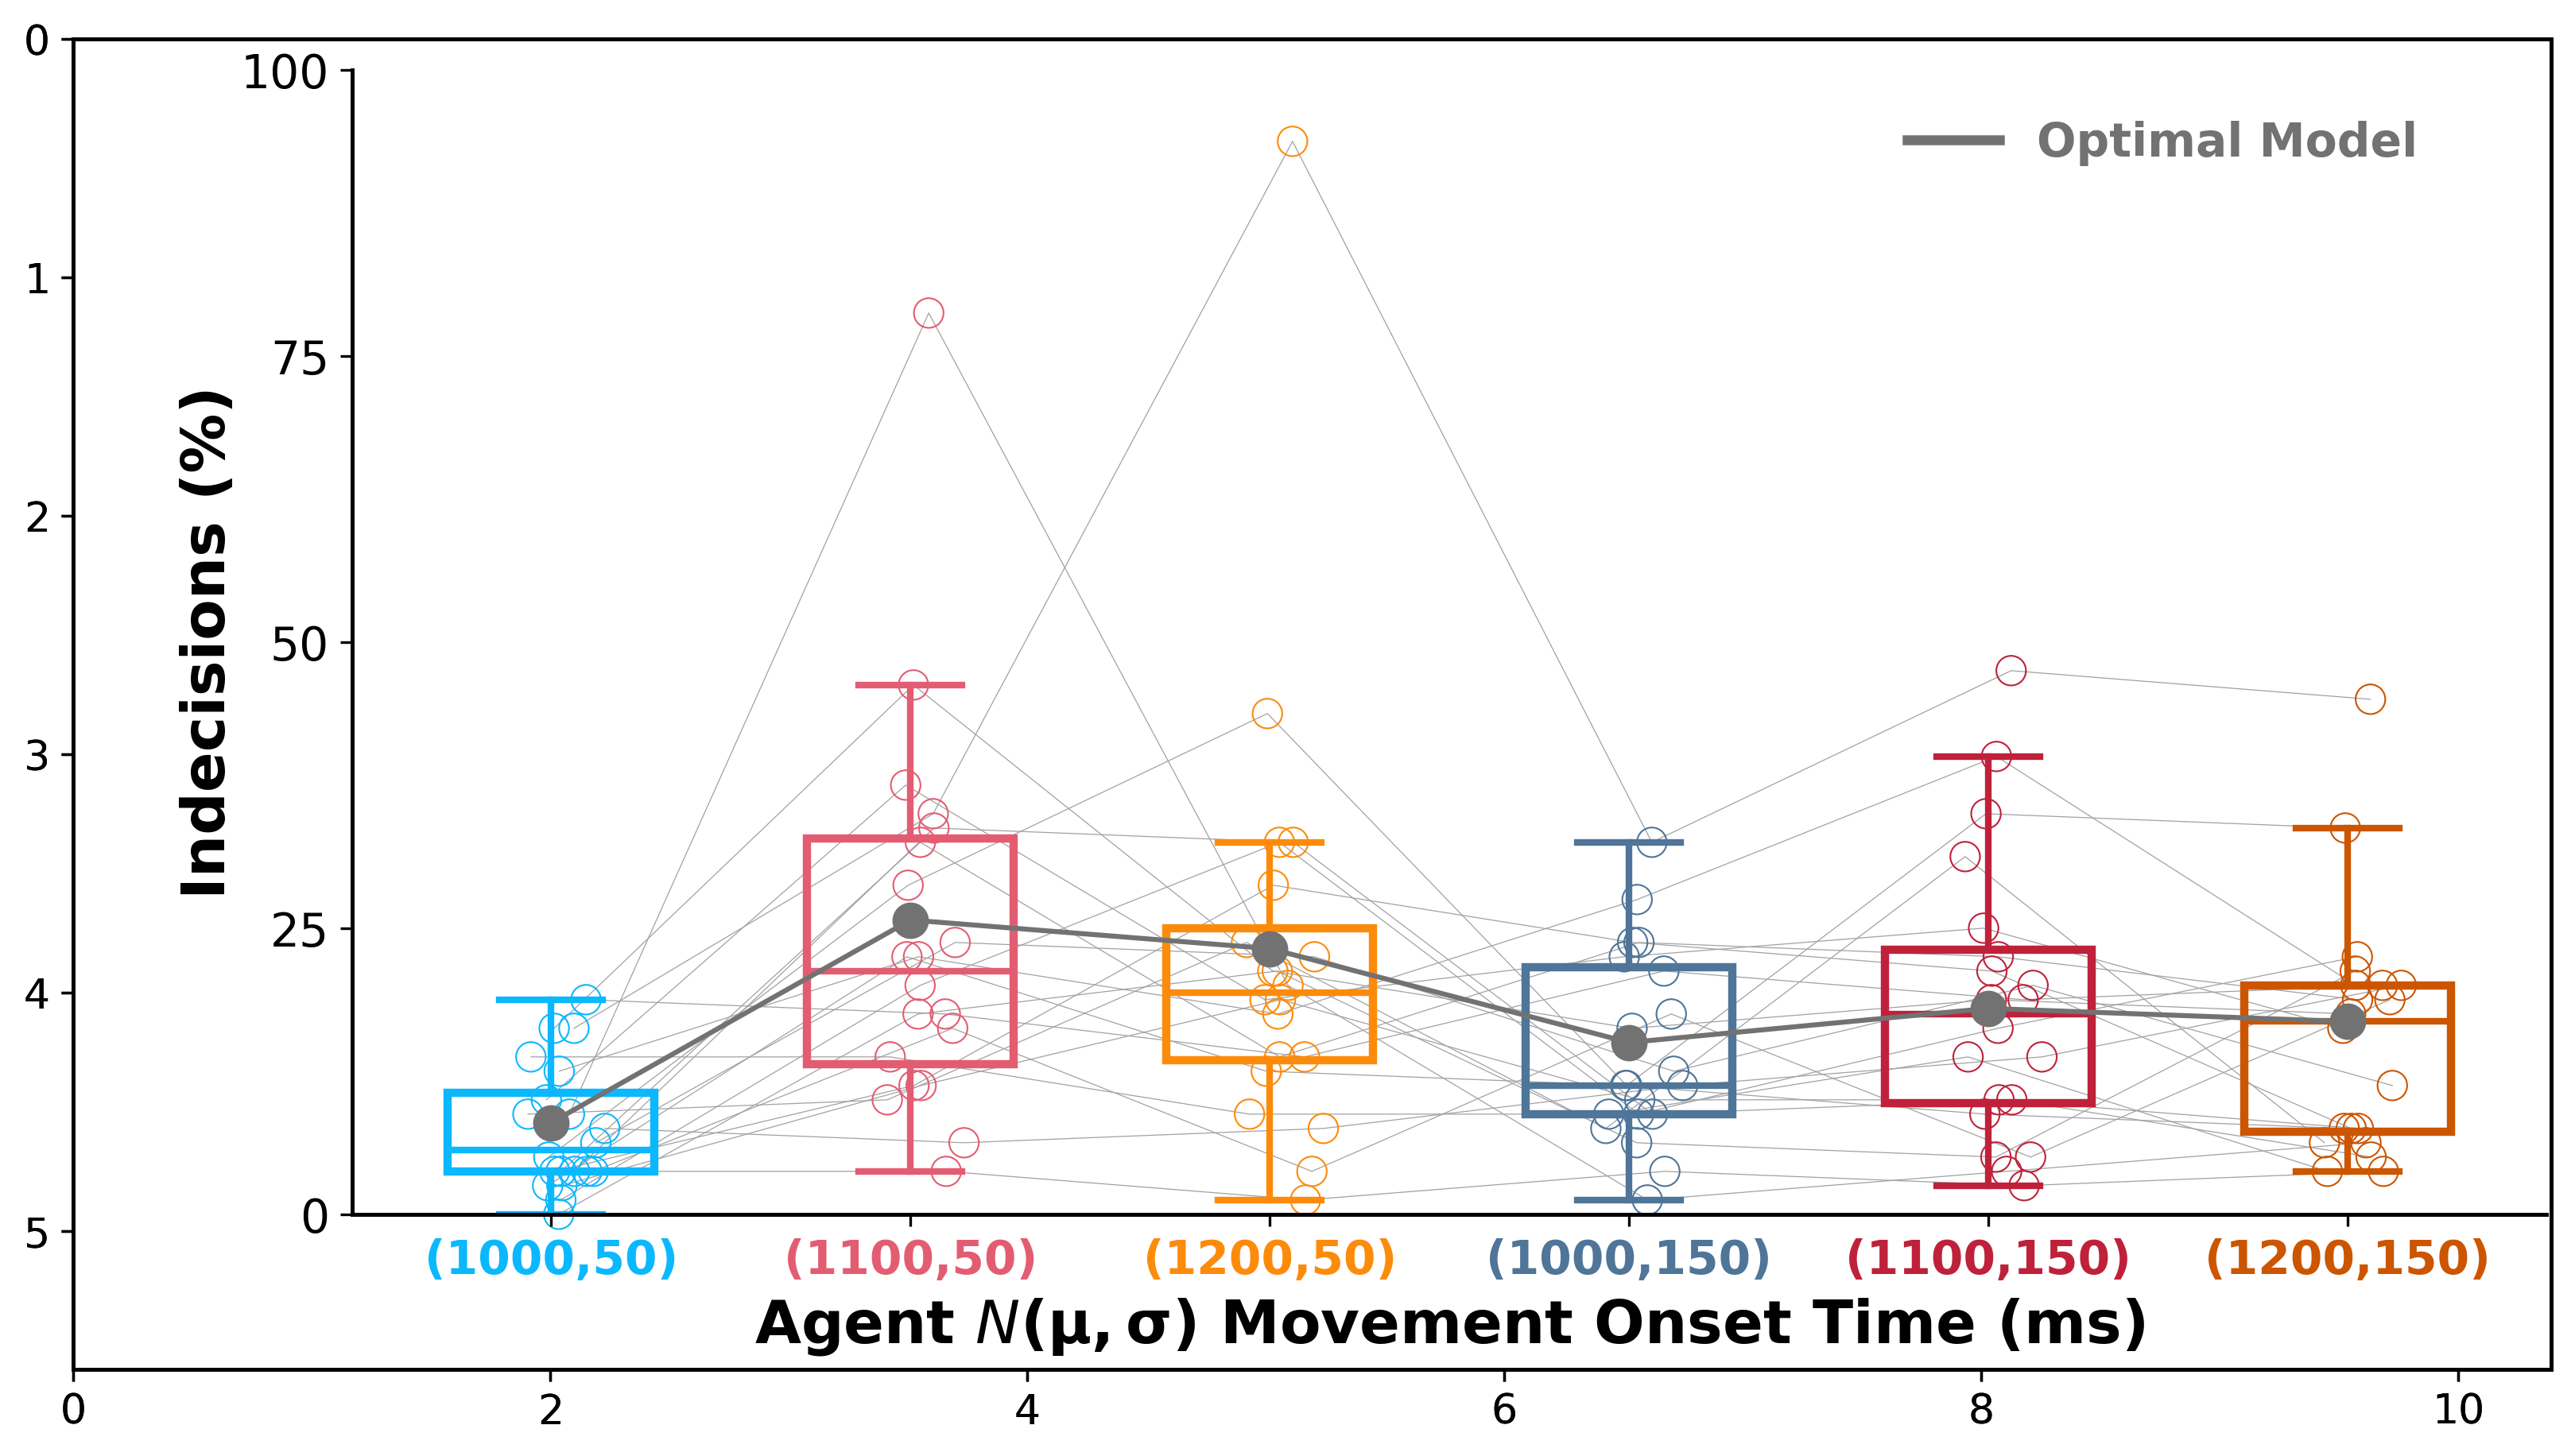

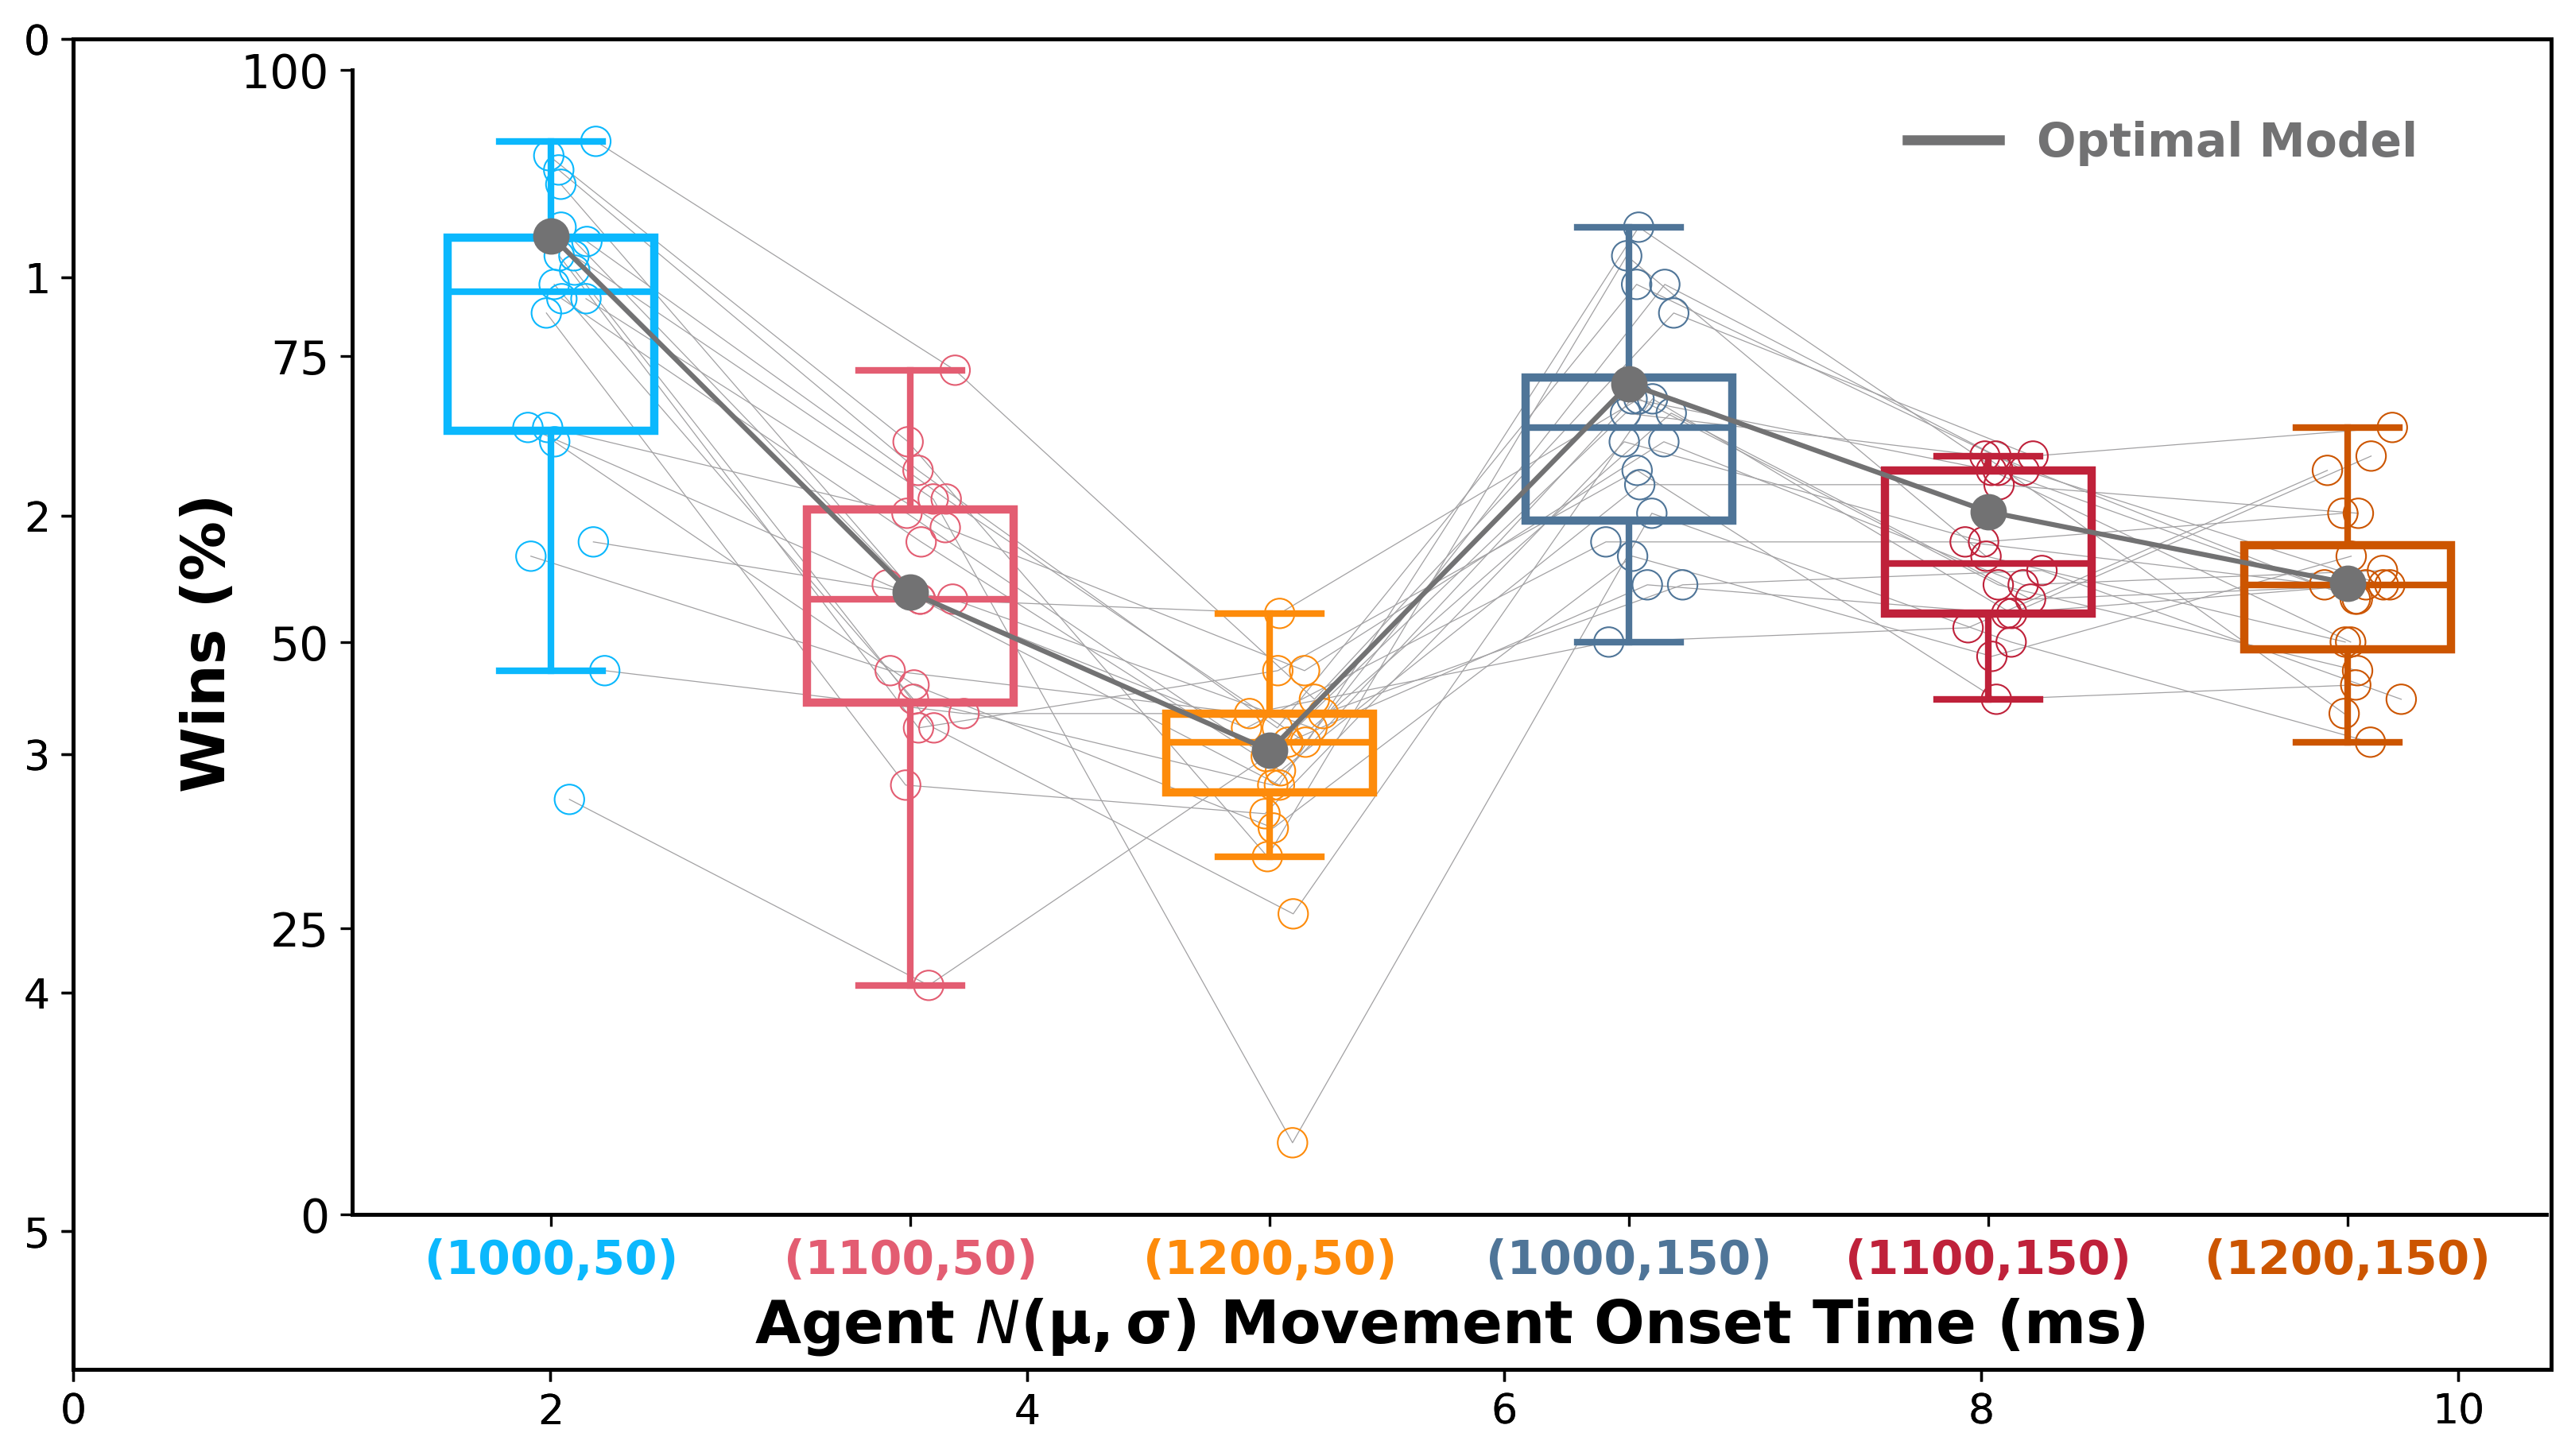

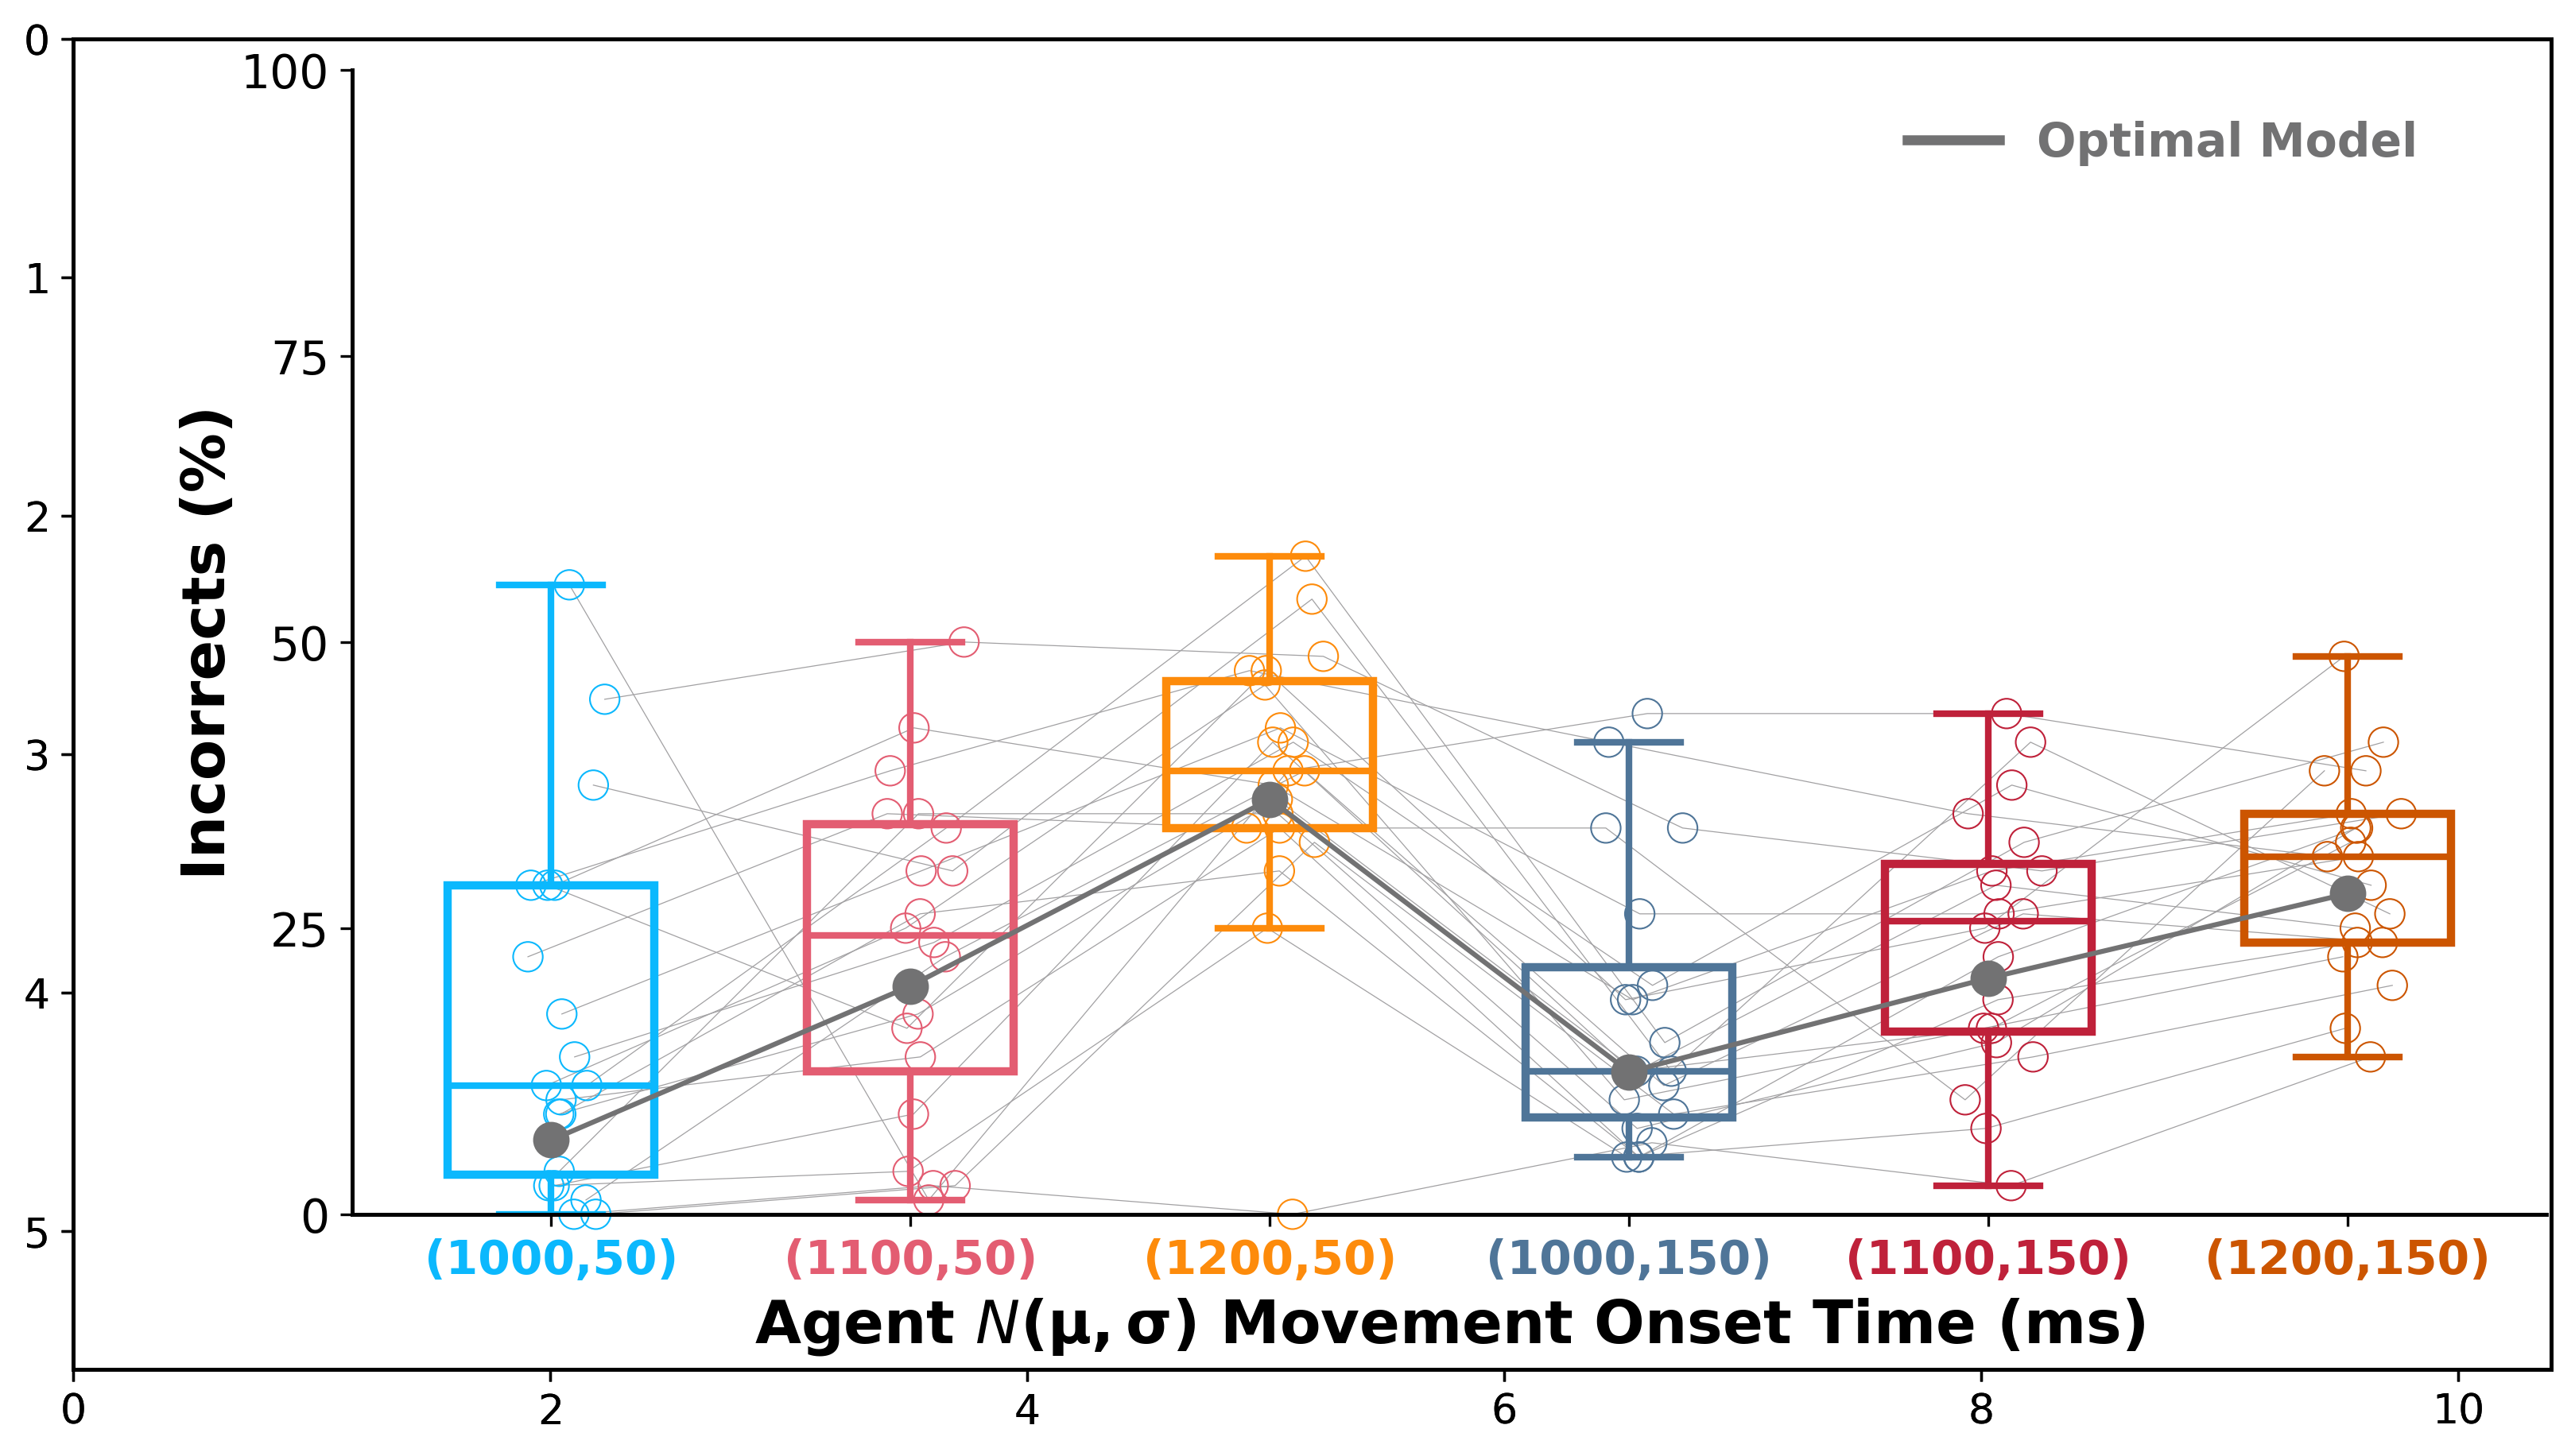

In [106]:
w,h = 10.39,5.58
bw = (0.3*w)/it.num_blocks # box widths of all boxes combined takes up 30% of the width
mult_w, div_w = 0.053,2.3
div_h = 1.75
xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
inset_xlocs = np.linspace(1.5,3.5,num=3)
legend_fontsize = 14
ticklabel_fontsize = 14
axeslabel_fontsize = 18
suptitle_fontsize = 20

metrics = [np.nanmedian(group.movement_metrics.movement_onset_times('task'), axis=2),
           np.nanstd(group.movement_metrics.movement_onset_times('task'), axis=2),
            group.score_metrics.score_metric('indecisions')/group.exp_info.num_task_trials*100,
            group.score_metrics.score_metric('wins')/group.exp_info.num_task_trials*100,
            group.score_metrics.score_metric('incorrects')/group.exp_info.num_task_trials*100,
            ]
inset_metric = metrics[0][:,::2]
ylocs = [np.arange(0, 1751, 250),np.arange(0,400,100)] + [np.arange(0, 101, 25)]*3
ylabels = ['Participant Movement\nOnset Time (ms)', "Particiapnt SD Movement\nOnset Time (ms)",
           'Indecisions (%)', 'Wins (%)','Incorrects (%)',]
ylims = [(0,1750),(0,400)] + [(0,100)]*3

model_label = ['Optimal Model', 'Sub-Optimal Model']
save_names = ["exp1_movement_onset","exp1_movement_onset_sd", 'exp1_indecisions','exp1_wins',"exp1_incorrects"]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
models_to_plot = [[models[0]], models] # Using this to create the optimal model, then sub and optimal together like the model labels
legend_locs  = [[0.7,0.9],[0.7,0.9],[0.7,0.9], [0.7,0.9],[0.7,0.9]]


model_data = [
    [model.results.get_metric(model.player_behavior.wtd_leave_time,metric_type='true',decision_type='optimal') for model in models_to_plot[1]],
    [model.results.get_metric(model.player_behavior.wtd_leave_time_sd,metric_type='true',decision_type='optimal') for model in models_to_plot[1]],
    [model.results.get_metric(model.score_metrics.prob_indecision,metric_type='true',decision_type='optimal')*100 for model in models_to_plot[1]],
    [model.results.get_metric(model.score_metrics.prob_win,metric_type='true',decision_type='optimal')*100 for model in models_to_plot[1]],
    [model.results.get_metric(model.score_metrics.prob_incorrect,metric_type='true',decision_type='optimal')*100 for model in models_to_plot[1]],
]

collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]


for j in range(len(model_data)):
    fig = dv.Figure(figsize=(w,h),dpi=300)
    ax = fig.add_panel(dim=(1.17, 0.13, 9.2, 4.8))
    pf.multiple_models_boxplot(
            ax=ax,
            data=metrics[j],
            box_width = bw,
            model_data=model_data[j],
            show_boxplot=True,
            show_models=True,
            reorder_xaxis = True,
            labels=model_label,
            box_colors=constants.xticklabel_colors_means,
            line_colors = [wheel.dark_grey, wheel.black],
            jitter_data = False,
            jitter = True,
            data_markersize=80,
            linestyles=None,
            xlocs=xlocs,
            # xtick_locs = np.linspace(1, w/div_w - 0.5, num=len(it.trial_block_titles)),
            ylocs=ylocs[j],
            xticklabels=it.trial_block_titles,
            ticklabel_fontsize = ticklabel_fontsize,
            axeslabel_fontsize = axeslabel_fontsize,
            xlabel=it.xlabel,
            ylabel=ylabels[j],
            legend_fontsize=legend_fontsize,
            legend_loc=legend_locs[j],
            # legend_linewidth=
            model_markersize=10,
            box_lw = 2.5
        )
    ax.set_ylim(ylims[j])
    # [label.set_fontweight("bold") for label in inset_ax.yaxis.get_ticklabels()]
    # plt.suptitle(suptitles[i],fontsize = suptitle_fontsize, y=1.00, color = wheel.lighten_color(wheel.dark_grey,1.2))
    # fig.savefig(SAVE_PATH / 'median_movement_onset_inset.png')
    # break